<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Random-Forest." data-toc-modified-id="Random-Forest.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Random Forest.</a></span></li><li><span><a href="#DecisionTreeClassifier." data-toc-modified-id="DecisionTreeClassifier.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>DecisionTreeClassifier.</a></span></li><li><span><a href="#LogisticRegression." data-toc-modified-id="LogisticRegression.-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>LogisticRegression.</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier." data-toc-modified-id="DecisionTreeClassifier.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier.</a></span></li><li><span><a href="#LogisticRegression." data-toc-modified-id="LogisticRegression.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LogisticRegression.</a></span></li><li><span><a href="#DecisionTreeClassifier." data-toc-modified-id="DecisionTreeClassifier.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>DecisionTreeClassifier.</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем библиотеки.

In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

Прочитаем данные с файла и сохраним в data.

In [19]:
data = pd.read_csv('/datasets/Churn.csv')

Посмотрим общую информацию о файле.

In [20]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Согласно документации к данным, в таблице `Churn` имеются следующие столбцы:
* `сalls` — количество звонков
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScor`e — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — количество недвижимости у клиента
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата.<br>
<br>
* `RowNumber` — индекс строки в данных
* `Exited` — факт ухода клиента - целевой признак<br>
<br>


Есть пропуски в атрибуте "Tenure". В остальных данных ошибок в форматах нет.


In [21]:
data = data.loc[~(data['Tenure'].isna())]

Видно, что есть данные, которые не нужны для обучения моделей. `RowNumber`, `CustomerId` и `Surname` повторяют уже имеющиеся данные, поэтому стоит удалить их.

In [22]:
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

Имеются категорийные значения 'Geography' и 'Gender'. Для обучения моделей нужно преобразовать их в числа.

In [23]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


**Вывод этапа**:
Данные подготовлены для дальнейшего исследования:
- Удалены данные с повторяющимися категориями и пропусками
- `Geography` и `Gender` преобразованы в численные значения

## Исследование задачи

### Подготовка признаков

Произведем разбиение на целевой признак и атрибуты.

In [24]:
target = data['Exited']
features = data.drop('Exited', axis=1)

Выделим тестовую, тренировочную и валидационнную выборки. 25% данных выделим для валидационной выборки.

In [25]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size = 0.5, random_state = 12345)

Проведем нормализацию параметров, так как даные из тестовой выборки не должны быть в валидационной и тренировочной.

In [26]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts'].copy()
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Исследование моделей

#### Random Forest.

In [27]:
best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in range(1,50):
    for depth in range(1,25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.6310160427807487
Глубина лучшей модели: 12
Количество деревьев лучшей модели: 42


#### DecisionTreeClassifier.

In [28]:
best_model = None
best_result = 0
best_depth = 0
results = []
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.5754189944134078
Глубина лучшей модели: 6
Количество деревьев лучшей модели: 42


#### LogisticRegression.

In [29]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('F1 логистической регрессии:', result)

F1 логистической регрессии: 0.35000000000000003


**Вывод этапа**:
Были исследованы модели Random Forest, Desicion Tree и Logistic Regression.

Получены следующие показатели
Random Forest: 
- F1 лучшей модели: 0.6310160427807487
- Глубина лучшей модели: 12
- Количество деревьев лучшей модели: 42<br>
<br>
Decision Tree:
- F1 лучшей модели: 0.5754189944134078
- Глубина лучшей модели: 6
- Количество деревьев лучшей модели: 42<br>
<br>
Logistic Regression:
- F1 логистической регрессии: 0.35000000000000003<br>
<br>

C учетом наличия дисбаланса, лучше всего себя показала модель случайного леса с F1 0.631 при глубине деревьев в 12 и количестве деревьев 42.

## Борьба с дисбалансом

### Обработка данных

Создадим функции даунсемплинга и апсемплинга.

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Посчитаем отношение дисбаланса значений в целевом признаке.

In [32]:
k = target.loc[target == 0].count() / target.loc[target == 1].count()
k

3.9034519956850056

Количество пользователей, которые продолжают пользоваться услугами банка в 3.9 раза выше количества пользователей, которые перестали пользоваться услугами банка.

Из этого значения получим, что в случае даунсемплинга нужно использовать коэфициент 0.25, апсемплинга - 4.

In [33]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проведем проверку моделей на даунсемплинге.<br>
Исследуем Random Forest.

In [34]:
best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in range(1,50):
    for depth in range(1,25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.6182432432432432
Глубина лучшей модели: 7
Количество деревьев лучшей модели: 25


### Исследование моделей

#### DecisionTreeClassifier.

In [35]:
best_model = None
best_result = 0
best_depth = 0
results = []
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.5714285714285714
Глубина лучшей модели: 5
Количество деревьев лучшей модели: 25


#### LogisticRegression.

In [36]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print('F1 логистической регрессии:', result)

F1 логистической регрессии: 0.4890829694323144


Проведем проверку моделей на апсемплинге.<br>
Исследуем Random Forest.

In [48]:
best_result = 0
best_model = None
best_est = 0
best_depth = 0
results = []
for est in range(1,50):
    for depth in range(1,25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.6460905349794239
Глубина лучшей модели: 12
Количество деревьев лучшей модели: 14


#### DecisionTreeClassifier.

In [51]:
best_model = None
best_result = 0
best_depth = 0
results = []
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('F1 лучшей модели:', best_result)
print('Глубина лучшей модели:', best_depth)
print('Количество деревьев лучшей модели:', best_est)

F1 лучшей модели: 0.5685279187817259
Глубина лучшей модели: 5
Количество деревьев лучшей модели: 14


**Вывод этапа**:
Был устранен дисбаланс в данных, написаны функции апсемплинга и даунсемплинга, а также исследованы модели Random Forest, Desicion Tree и Logistic Regression.

Получены следующие показатели

**Random Forest** 
- Даунсемплинг:
    * F1 лучшей модели: 0.6182432432432432
    * Глубина лучшей модели: 7
    - Количество деревьев лучшей модели: 25<br>
- Апсемплинг:
    - F1 лучшей модели: 0.6460905349794239
    - Глубина лучшей модели: 12
    - Количество деревьев лучшей модели: 40<br>


**Decision Tree**
- Даунсемплинг:
    - F1 лучшей модели: 0.5714285714285714
    - Глубина лучшей модели: 5
    - Количество деревьев лучшей модели: 25<br>
- Апсемплинг:
    - F1 лучшей модели: 0.5685279187817259
    - Глубина лучшей модели: 5
    - Количество деревьев лучшей модели: 14<br>


**Logistic Regression**
- Даунсемплинг:
    - F1 логистической регрессии: 0.4890829694323144<br>
- Апсемплинг:
    - F1 логистической регрессии: 0.48476052249637164<br>

Лучшей моделью опять оказался случайный лес с апсемплингом с F1 0.646, глубиной 12 и количество деревьев 40
Поэтому будем использовать именно эту модель и гиперпараметры для финальной модели.

## Тестирование модели

Проведем проверку модели на тестовых данных

In [57]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=12) 
model.fit(features_upsampled, target_upsampled)
predicted = model.predict(features_test)
result = f1_score(target_test, predicted)
print('F1 на лучшей модели:', result)

F1 на лучшей модели: 0.5975103734439834


Проверим значение метрики AUC-ROC для этой модели.

In [58]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8581230611156119

Построим график и посмотрим визуально как выглядит кривая.

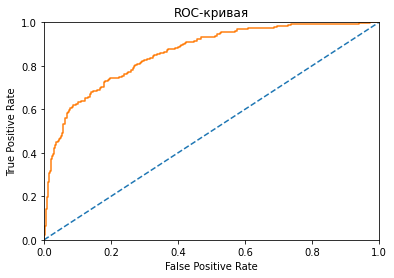

In [59]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')


plt.show()

**Вывод этапа**:<br>

Был проведено тестирование модели на тестовых данных. В результате получили значение метрики F1 0.5975103734439834.
    
Значение метрики AUC-ROC 0.8581230611156119 достаточно высокое - это показывает достаточно высокую точность определения положительных решений.

**Общий вывод**:
Итак, полученный архив данных - данные о клиентах «Бета-Банка».

Для исследования данных на этапе предобработки были удалены данные с повторяющимися категориями и пропусками, а также столбцы `Geography` и `Gender` преобразованы в численные значения

Были исследованы модели Random Forest, Desicion Tree и Logistic Regression на данных с дисбалансом, где были получены следующие показатели метрики F1: *Random Forest* - 0.6310160427807487, *Decision Tree* - 0.5754189944134078, *Logistic Regression* - 0.35000000000000003.

C учетом наличия дисбаланса, лучше всего себя показала модель случайного леса с F1 - 0.631 при глубине деревьев в 12 и количестве деревьев 42.

Был устранен дисбаланс в данных, написаны функции апсемплинга и даунсемплинга, и повторно исследованы модели Random Forest, Desicion Tree и Logistic Regression уже на новых данных. Получены следующие показатели


**Random Forest** 
- Даунсемплинг:
    * F1 лучшей модели: 0.6182432432432432
    * Глубина лучшей модели: 7
    - Количество деревьев лучшей модели: 25<br>
- Апсемплинг:
    - F1 лучшей модели: 0.6460905349794239
    - Глубина лучшей модели: 12
    - Количество деревьев лучшей модели: 40<br>


**Decision Tree**
- Даунсемплинг:
    - F1 лучшей модели: 0.5714285714285714
    - Глубина лучшей модели: 5
    - Количество деревьев лучшей модели: 25<br>
- Апсемплинг:
    - F1 лучшей модели: 0.5685279187817259
    - Глубина лучшей модели: 5
    - Количество деревьев лучшей модели: 14<br>


**Logistic Regression**
- Даунсемплинг:
    - F1 логистической регрессии: 0.4890829694323144<br>
- Апсемплинг:
    - F1 логистической регрессии: 0.48476052249637164<br>

Лучшей моделью опять оказался случайный лес с апсемплингом с F1 0.646, глубиной 12 и количество деревьев 40
Поэтому будем использовать именно эту модель и гиперпараметры для финальной модели.
<br>

Был проведено тестирование модели на тестовых данных. В результате получили значение метрики F1 0.5975103734439834.

Значение метрики AUC-ROC 0.8581230611156119 достаточно высокое - это показывает достаточно высокую точность определения положительных решений.

Итогом исследования можно сказать, что лучше моделью классификации была сбалансированная модель случайного леса.